### Imports

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.integrate as spi

### Models

Madau & Dickinson

In [2]:
z = np.linspace(0, 20, 10000)

M_D = 0.015 * (1 + z)**2.7 / (1 + ((1 + z) / 2.9)**5.6)

trans_M_D = 0.66 * M_D

Harikane

In [3]:
harikane = 1 /(61.7 * (1+z)**(-3.13) + 1.0 * 10**(0.22*(1+z)) + 2.4 * 10**(0.5*(1+z) - 3.0))

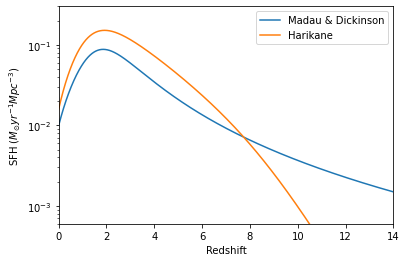

In [4]:
plt.plot(z, trans_M_D, label = 'Madau & Dickinson')
plt.plot(z, harikane, label = 'Harikane')
plt.xlim(0, 14)
plt.ylim(6e-4,3e-1)
plt.yscale('log')
plt.ylabel('SFH ($M_{\odot} yr^{-1} Mpc^{-3}$)')
plt.xlabel('Redshift')
plt.legend()

### Data

Madau & Dickinson 

In [5]:
wyder_redshift = np.array([0.055])
wyder_z_lower = np.array([0.045])
wyder_z_upper = np.array([0.045])
wyder_data = np.array([-1.82])
wyder_data_lower = np.array([0.02])
wyder_data_upper = np.array([0.09])


schiminovich_redshift = np.array([0.3, 0.5, 0.7, 1.0])
schiminovich_z = np.array([0.1, 0.1, 0.1, 0.2])
schiminovich_data = np.array([-1.5, -1.39, -1.20, -1.25])
schiminovich_data_lower = np.array([0.05, 0.08, 0.13, 0.13])
schiminovich_data_upper = np.array([0.05, 0.15, 0.31, 0.31]) 
schiminovich_errors = np.array([schiminovich_data_lower, schiminovich_data_upper])

robotham_redshift = np.array([0.05])
robotham_data = np.array([-1.77])
robotham_data_lower = np.array([0.09])
robotham_data_upper = np.array([0.08])


cucciati_redshift= np.array([0.125, 0.3, 0.5, 0.7, 0.9, 1.1, 1.45, 2.1, 3.0, 4.0])
cucciati_z = np.array([0.075, 0.1, 0.1, 0.1, 0.1, 0.1, 0.25, 0.4, 0.5, 0.5])
cucciati_data = np.array([-1.75, -1.55, -1.44, -1.24, -0.99, -0.94, -0.95, -0.75, -1.04, -1.69])
cucciati_data_lower = np.array([0.18, 0.12, 0.10, 0.10, 0.08, 0.09, 0.8, 0.09, 0.15, 0.32])
cucciati_data_upper = np.array([0.18, 0.12, 0.10, 0.10, 0.09, 0.09, 0.15, 0.49, 0.26, 0.22])
cucciati_errors = np.array([cucciati_data_lower, cucciati_data_upper])


dahlen_redshift = np.array([1.125, 1.75, 2.225])
dahlen_z = np.array([0.205, 0.13, 0.145])
dahlen_data = np.array([-1.02, -0.75, -0.87])
dahlen_data_lower = np.array([0.08, 0.12, 0.09])
dahlen_data_upper = np.array([0.08, 0.12, 0.09])
dahlen_errors = np.array([dahlen_data_lower, dahlen_data_upper])

reddy_redshift = np.array([2.3, 3.05])
reddy_z = np.array([0.4, 0.35])
reddy_data = np.array([-0.75, -0.97])
reddy_data_lower = np.array([0.11, 0.15])
reddy_data_upper = np.array([0.09, 0.11])
reddy_errors = np.array([reddy_data_lower, reddy_data_upper])

bouwens_redshift = np.array([3.8, 4.9, 5.9, 7.0, 7.9])
bouwens_data = np.array([-1.29, -1.42, -1.65, -1.79, -2.09])
bouwens_data_lower = np.array([0.05, 0.06, 0.08, 0.10, 0.11])
bouwens_data_upper = np.array([0.05, 0.06, 0.08, 0.10, 0.11])
bouwens_errors = np.array([bouwens_data_lower, bouwens_data_upper])

schenker_redshift = np.array([7])
schenker_data = np.array([-2.00])
schenker_data_lower = np.array([0.11])
schenker_data_upper = np.array([0.10])
schenker_errors = np.array([schenker_data_lower, schenker_data_upper])

In [6]:
sanders_redshift = np.array([0.03])
sanders_data = np.array([-1.72])
sanders_data_lower = np.array([0.03])
sanders_data_upper = np.array([0.02])
sanders_errors = np.array([sanders_data_lower, sanders_data_upper])

takeuchi_redshift = np.array([0.03])
takeuchi_data = np.array([-1.95])
takeuchi_data_lower = np.array([0.20])
takeuchi_data_upper = np.array([0.20])
takeuchi_errors = np.array([takeuchi_data_lower, takeuchi_data_upper])

magnelli11_redshift = np.array([0.55, 0.85, 1.15, 1.55, 2.05])
magnelli11_z = np.array([0.15, 0.15, 0.15, 0.25, 0.25])
magnelli11_data = np.array([-1.34, -0.96, -0.89, 0.91, -0.89])
magnelli11_data_lower = np.array([0.11, 0.19, 0.21, 0.21, 0.25])
magnelli11_data_upper = np.array([0.22, 0.15, 0.27, 0.17, 0.21])
magnelli11_errors = np.array([magnelli11_data_lower, magnelli11_data_upper])

magnelli13_redshift = np.array([0.55, 0.85, 1.15, 1.55, 2.05])
magnelli13_z = np.array([0.15, 0.15, 0.15, 0.25, 0.25])
magnelli13_data = np.array([-1.22, -1.10, -0.96, -0.94, -0.8])
magnelli13_data_lower = np.array([0.11, 0.13, 0.20, 0.18, 0.15])
magnelli13_data_upper = np.array([0.08, 0.10, 0.13, 0.13, 0.18])
magnelli13_errors = np.array([magnelli13_data_lower, magnelli13_data_upper])

gruppioni_redshift = np.array([0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25, 2.75, 3.6])
gruppioni_z = np.array([0.15, 0.075, 0.075, 0.1, 0.1, 0.1, 0.25, 0.15, 0.25, 0.25, 0.6])
gruppioni_data = np.array([-1.64, -1.42, -1.32, -1.14, -0.94, -0.81, -0.84, -0.86, -0.91, -0.86, -1.36])
gruppioni_data_lower = np.array([0.11, 0.04, 0.05, 0.06, 0.06, 0.05, 0.04, 0.03, 0.12, 0.23, 0.5])
gruppioni_data_upper = np.array([0.09, 0.03, 0.05, 0.06, 0.05, 0.04, 0.04, 0.02, 0.09, 0.15, 0.23])
gruppioni_errors = np.array([gruppioni_data_lower, gruppioni_data_upper])

Finkelstein

THE EVOLUTION OF THE GALAXY REST-FRAME ULTRAVIOLET LUMINOSITY FUNCTION OVER THE FIRST TWO BILLION YEARS (2015)

They provide both observed and dust-corrected values for the log of SFR density

In [7]:
finkelstein_redshift = np.array([4, 5, 6, 7, 8])
finkelstein_data_obs = np.array([-1.59, -1.69, -1.97, -2.09, -2.20])
finkelstein_data_obs_lower = np.array([0.01, 0.01, 0.02, 0.06, 0.19])
finkelstein_data_obs_upper = np.array([0.01, 0.01, 0.02, 0.06, 0.19])
finkelstein_obs_errors = np.array([finkelstein_data_obs_lower, finkelstein_data_obs_upper])
finkelstein_data_dc = np.array([-1.03, -1.20, -1.68, -1.85, -2.20])
finkelstein_data_dc_lower = np.array([0.21, 0.25, 0.18, 0.16, 0.19])
finkelstein_data_dc_upper = np.array([0.23, 0.20, 0.24, 0.22, 0.19])
finkelstein_dc_errors = np.array([finkelstein_data_dc_lower, finkelstein_data_dc_upper])

Harikane

In [8]:
harikane_redshift = np.array([9, 12, 16])
harikane_data = np.array([-2.61, -3.23, -3.59])
harikane_data_lower = np.array([0.16, 0.27, 2.83])
harikane_data_upper = np.array([0.18, 0.29, 0.33])
harikane_errors = np.array([harikane_data_lower, harikane_data_upper])

In [9]:
mcleod16_redshift = np.array([9, 10])
mcleod16_data = np.array([-2.59, -2.76])
mcleod16_data_lower = np.array([0.14, 0.21])
mcleod16_data_upper = np.array([0.10, 0.14])

#### 'High z'

Note: 'Donnan' refers to the best fit ptoduced by the Donnan et al. paper:

The evolution of the galaxy UV luminosity function at redshifts z 8 – 15 from deep JWST and ground-based near-infrared imaging

In [10]:
log_10_donnan = -0.231*z +27.5 - 27.93930216

McLeod et al. 2023:

The galaxy UV luminosity function at z 11 from a suite of public JWST ERS, ERO, and Cycle-1 programs

In [11]:
mcleod23_redshift = np.array([11])
mcleod23_data = np.array([25.15 - 27.93930216])
mcleod23_data_lower = np.array([0.14])
mcleod23_data_upper = np.array([0.13])

mcleod23_tent_redshift = np.array([13.5])
mcleod23_tent_data = np.array([24.54 - 27.93930216])
mcleod23_tent_data_lower = np.array([0.25])
mcleod23_tent_data_upper = np.array([0.16])

Perz-Gonzalez 2023:

Life beyond 30: Probing the −20<MUV<−17 Luminosity Function at 8<z<13 with the NIRCam Parallel Field of the MIRI Deep Survey

In [12]:
pg23_redshift = np.array([9, 10.75, 12.12])
pg23_z = np.array([1, 0.75, 0.75])
pg23_data = np.array([-2.760325212, -2.812197361, -3.240332155])
#pg23_data_lower = np.array([?])
#pg23_data_upper = np.array([?])

Oesch 2018:

The Dearth of z ∼ 10 Galaxies in All HST Legacy Fields—The Rapid Evolution of the Galaxy Population in the First 500 Myr*

In [13]:
oesch18_redshift = np.array([10])
oesch18_data = np.array([-3.29])
oesch18_data_lower = np.array([0.16])
oesch18_data_upper = np.array([0.16])

Bouwens et al. 2022:

Evolution of the 𝑈𝑉 LF from 𝑧 ∼ 15 to 𝑧 ∼ 8 Using New JWST NIRCam Medium-Band Observations over the HUDF/XDF

Note: when you consider these, be aware that they have a limiting magnitude of -18. A lot of the others have -17

In [14]:
bouwens22_redshift = np.array([8.7, 10.5, 12.6])
bouwens22_data = np.array([-3.00, -3.82, -3.24])
bouwens22_data_lower = np.array([0.24, 0.30, 0.48])
bouwens22_data_upper = np.array([0.24, 0.30, 0.37])


### Plotting

<ipython-input-15-d3f5caf6f388>:4: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([[wyder_data_lower], [wyder_data_upper]]), xerr = ([[wyder_z_lower], [wyder_z_upper]]), capsize = 5, fmt='', color = 'Black', label = 'Madau & Dickinson', alpha = 0.2, markersize = 6)
<ipython-input-15-d3f5caf6f388>:6: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([[robotham_data_lower], [robotham_data_upper]]), fmt='o', color = 'Black', alpha = 0.2, markersize = 6)


<Figure size 864x576 with 0 Axes>

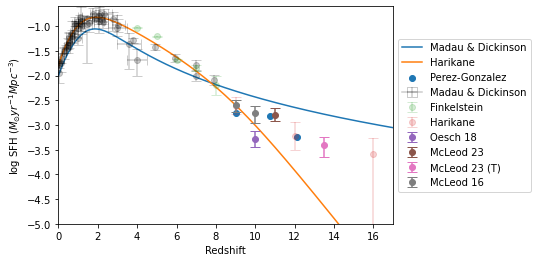

<Figure size 864x576 with 0 Axes>

In [15]:
plt.plot(z, np.log10(trans_M_D), label = 'Madau & Dickinson')
plt.plot(z, np.log10(harikane), label = 'Harikane')

plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([[wyder_data_lower], [wyder_data_upper]]), xerr = ([[wyder_z_lower], [wyder_z_upper]]), capsize = 5, fmt='', color = 'Black', label = 'Madau & Dickinson', alpha = 0.2, markersize = 6)
plt.errorbar(schiminovich_redshift, schiminovich_data, yerr=schiminovich_errors, xerr=schiminovich_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([[robotham_data_lower], [robotham_data_upper]]), fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(cucciati_redshift, cucciati_data, yerr=cucciati_errors, xerr=cucciati_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(dahlen_redshift, dahlen_data, yerr=dahlen_errors, xerr = dahlen_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(reddy_redshift, reddy_data, yerr=reddy_errors, xerr = reddy_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(bouwens_redshift, bouwens_data, yerr=bouwens_errors, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(schenker_redshift, schenker_data, yerr=schenker_errors, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)

plt.errorbar(sanders_redshift, sanders_data, yerr=sanders_errors, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(takeuchi_redshift, takeuchi_data, yerr=takeuchi_errors, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(magnelli11_redshift, magnelli11_data, yerr=magnelli11_errors, xerr= magnelli11_z,capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(magnelli13_redshift, magnelli13_data, yerr=magnelli13_errors, xerr = magnelli13_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(gruppioni_redshift, gruppioni_data, yerr=gruppioni_errors, xerr = gruppioni_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)


plt.errorbar(finkelstein_redshift, finkelstein_data_dc, yerr = finkelstein_obs_errors, capsize = 5, fmt='o', label = 'Finkelstein', alpha = 0.2, markersize = 6)

plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', alpha = 0.2, markersize = 6)

plt.errorbar(oesch18_redshift, oesch18_data, yerr = np.array([oesch18_data_lower, oesch18_data_upper]), fmt = 'o', label = 'Oesch 18', capsize = 5)
plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), fmt = 'o', capsize = 5, label = 'McLeod 23')
plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), fmt = 'o', capsize = 5, label = 'McLeod 23 (T)')
plt.scatter(pg23_redshift, pg23_data, label = 'Perez-Gonzalez')
plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), fmt = 'o', capsize = 5, label = 'McLeod 16')


plt.xlim(0, 17)
plt.ylim(-5, -0.6)
plt.ylabel('log SFH ($M_{\odot} yr^{-1} Mpc^{-3}$)')
plt.xlabel('Redshift')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(12, 8))

<ipython-input-16-3e595748ec0c>:5: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([[wyder_data_lower], [wyder_data_upper]]), xerr = ([[wyder_z_lower], [wyder_z_upper]]), capsize = 5, fmt='', color = 'Black', label = 'Madau & Dickinson', alpha = 0.2, markersize = 6)
<ipython-input-16-3e595748ec0c>:7: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([[robotham_data_lower], [robotham_data_upper]]), fmt='o', color = 'Black', alpha = 0.2, markersize = 6)


<Figure size 864x576 with 0 Axes>

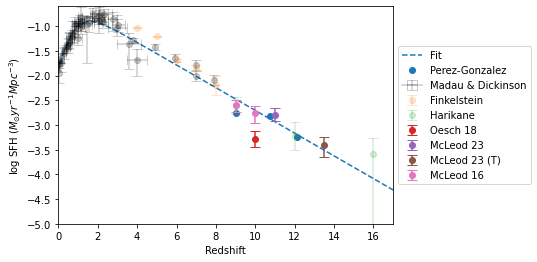

<Figure size 864x576 with 0 Axes>

In [16]:
plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), '--', label = 'Fit')

#plt. plot(z, np.log10(1 /(61.7 * (1+z)**(-3.13) + 1.0 * 10**(0.24*(1+z)) + 2.4 * 10**(0.4*(1+z) - 3.5))), label = 'Estimate')

plt.errorbar(wyder_redshift, wyder_data, yerr=np.array([[wyder_data_lower], [wyder_data_upper]]), xerr = ([[wyder_z_lower], [wyder_z_upper]]), capsize = 5, fmt='', color = 'Black', label = 'Madau & Dickinson', alpha = 0.2, markersize = 6)
plt.errorbar(schiminovich_redshift, schiminovich_data, yerr=schiminovich_errors, xerr=schiminovich_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(robotham_redshift, robotham_data, yerr=np.array([[robotham_data_lower], [robotham_data_upper]]), fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(cucciati_redshift, cucciati_data, yerr=cucciati_errors, xerr=cucciati_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(dahlen_redshift, dahlen_data, yerr=dahlen_errors, xerr = dahlen_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(reddy_redshift, reddy_data, yerr=reddy_errors, xerr = reddy_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(bouwens_redshift, bouwens_data, yerr=bouwens_errors, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(schenker_redshift, schenker_data, yerr=schenker_errors, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)

plt.errorbar(sanders_redshift, sanders_data, yerr=sanders_errors, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(takeuchi_redshift, takeuchi_data, yerr=takeuchi_errors, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(magnelli11_redshift, magnelli11_data, yerr=magnelli11_errors, xerr= magnelli11_z,capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(magnelli13_redshift, magnelli13_data, yerr=magnelli13_errors, xerr = magnelli13_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)
plt.errorbar(gruppioni_redshift, gruppioni_data, yerr=gruppioni_errors, xerr = gruppioni_z, capsize = 5, fmt='o', color = 'Black', alpha = 0.2, markersize = 6)


plt.errorbar(finkelstein_redshift, finkelstein_data_dc, yerr = finkelstein_obs_errors, capsize = 5, fmt='o', label = 'Finkelstein', alpha = 0.2, markersize = 6)

plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane', alpha = 0.2, markersize = 6)

plt.errorbar(oesch18_redshift, oesch18_data, yerr = np.array([oesch18_data_lower, oesch18_data_upper]), fmt = 'o', label = 'Oesch 18', capsize = 5)
plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), fmt = 'o', capsize = 5, label = 'McLeod 23')
plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), fmt = 'o', capsize = 5, label = 'McLeod 23 (T)')
plt.scatter(pg23_redshift, pg23_data, label = 'Perez-Gonzalez')
plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), fmt = 'o', capsize = 5, label = 'McLeod 16')


plt.xlim(0, 17)
plt.ylim(-5, -0.6)
plt.ylabel('log SFH ($M_{\odot} yr^{-1} Mpc^{-3}$)')
plt.xlabel('Redshift')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(12, 8))

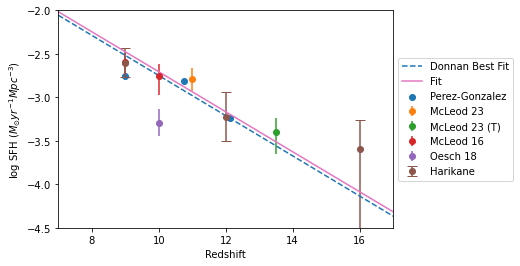

In [17]:
plt.plot(z, log_10_donnan, '--', label = 'Donnan Best Fit')

plt.errorbar(mcleod23_redshift, mcleod23_data, yerr = np.array([mcleod23_data_lower, mcleod23_data_upper]), fmt = 'o', label = 'McLeod 23')
plt.errorbar(mcleod23_tent_redshift, mcleod23_tent_data, yerr = np.array([mcleod23_tent_data_lower, mcleod23_tent_data_upper]), fmt = 'o', label = 'McLeod 23 (T)')
plt.scatter(pg23_redshift, pg23_data, label = 'Perez-Gonzalez')
plt.errorbar(mcleod16_redshift, mcleod16_data, yerr = np.array([mcleod16_data_lower, mcleod16_data_upper]), fmt = 'o', label = 'McLeod 16')
plt.errorbar(oesch18_redshift, oesch18_data, yerr = np.array([oesch18_data_lower, oesch18_data_upper]), fmt = 'o', label = 'Oesch 18')
plt.errorbar(harikane_redshift, harikane_data, yerr = harikane_errors, capsize = 5, fmt='o', label = 'Harikane')


plt. plot(z, np.log10(1 /(79 * (1+z)**(-3.82) + 1.5 * 10**(0.23*(1+z)) + 1.95 * 10**(-24*(1+z) - 5.85))), label = 'Fit')


plt.xlim(7, 17)
plt.ylim(-4.5, -2)
plt.ylabel('log SFH ($M_{\odot} yr^{-1} Mpc^{-3}$)')
plt.xlabel('Redshift')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))